<a href="https://colab.research.google.com/github/Leolio18/DataScienceEcosystem/blob/main/Cars_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Part of the code:**

In [ ]:
#Import library
# A very useful collection of libraries is imported

import pandas as pd
import numpy as np
from ipywidgets import Dropdown, Output, HBox, VBox
from IPython.display import display
import matplotlib.pyplot as pltplt
import seaborn as sns

# Data Source
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
#Read data from link without headers using pandas function
df = pd.read_csv(url, header=None)
# Add headeers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
# Lets take a look at our data
#df.head(30)
#df.info()
# our data probaly need editing in order to be able to extract any useful information

**Data Preparation - "Data Formatting" : drop/replace/leave missing data and review final formatting**

In [ ]:
#Lets prepare our data

# Replacing "?" with the average of the column

# First replace ? with NaN with is easily identifiable by algorithms
df=df.replace('?',np.nan)

# a small unit change in order to make sense
df['highway-mpg']= 235/df['highway-mpg']
df['city-mpg']= 235/df['city-mpg']
df = df.rename(columns={'highway-mpg': 'highway- lt/100km'})
df = df.rename(columns={'city-mpg': 'city- lt/100km'})



# Convert data to float where possible

num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].astype(float)
#df.head(50)
#df.info()

#Convert object columns to float where possible

object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Display the data types after conversion to confirm
#df.info()
numheaders= df.select_dtypes(include=np.number).columns
#print(numheaders)
#df.head()

# Identify missing values per column
df.isnull().sum()

#Choose appropriate strategy for each column with missing values

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

df["num-of-doors"].replace(np.nan, "four", inplace=True)

#simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.isnull().sum()
df.head()

<ipython-input-13-bf504c495c1b>:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
<ipython-input-13-bf504c495c1b>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
<ipython-input-13-bf504c495c1b>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained as

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city- lt/100km,highway- lt/100km,price
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


**Exploratory data analysis / Descriptive statistics**

In [ ]:
# Create a dropdown to select an attribute

dropdown = Dropdown(options=numheaders,description='Select an option:',disabled=False,)
output = Output()
def on_value_change(change):
    with output:
        output.clear_output()
        selected_attribute = change['new']
        print(f"You selected the numerical attribute: {selected_attribute}")
        attribute=selected_attribute
        df[attribute].describe()
dropdown.observe(on_value_change, names='value')
print("Attempting to display widgets...")
display(dropdown, output)#



Attempting to display widgets...


Dropdown(description='Select an option:', options=('symboling', 'normalized-losses', 'wheel-base', 'length', '…

Output()

**Plotting initial relationships with seaborn !!**

In [ ]:
# Lets try z normalization

for col in numheaders:
    #df[col] = df[col] / df[col].max()
     df[col] = (df[col] - df[col].mean()) / df[col].std()
df.head()

# and plt again



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city- lt/100km,highway- lt/100km,price
0,1.739213,NaN,alfa-romero,gas,std,two,convertible,rwd,front,-1.686643,...,0.074267,mpfi,0.512720,-1.816834,-0.287645,0.169809,-0.261549,0.482278,0.361857,0.036224
1,1.739213,NaN,alfa-romero,gas,std,two,convertible,rwd,front,-1.686643,...,0.074267,mpfi,0.512720,-1.816834,-0.287645,0.169809,-0.261549,0.482278,0.361857,0.414350
2,0.133183,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,-0.706865,...,0.602571,mpfi,-2.375354,0.677503,-0.287645,1.252540,-0.261549,0.940069,0.542828,0.414350
3,0.936198,1.185029,audi,gas,std,four,sedan,fwd,front,0.173274,...,-0.430023,mpfi,-0.510901,0.456486,-0.035885,-0.056810,0.781564,-0.061350,-0.108669,0.093477
4,0.936198,1.185029,audi,gas,std,four,sedan,4wd,front,0.106848,...,0.218350,mpfi,-0.510901,0.456486,-0.539405,0.270528,0.781564,1.207114,1.431234,0.533891


Creating Pair Plot of Numerical Columns...


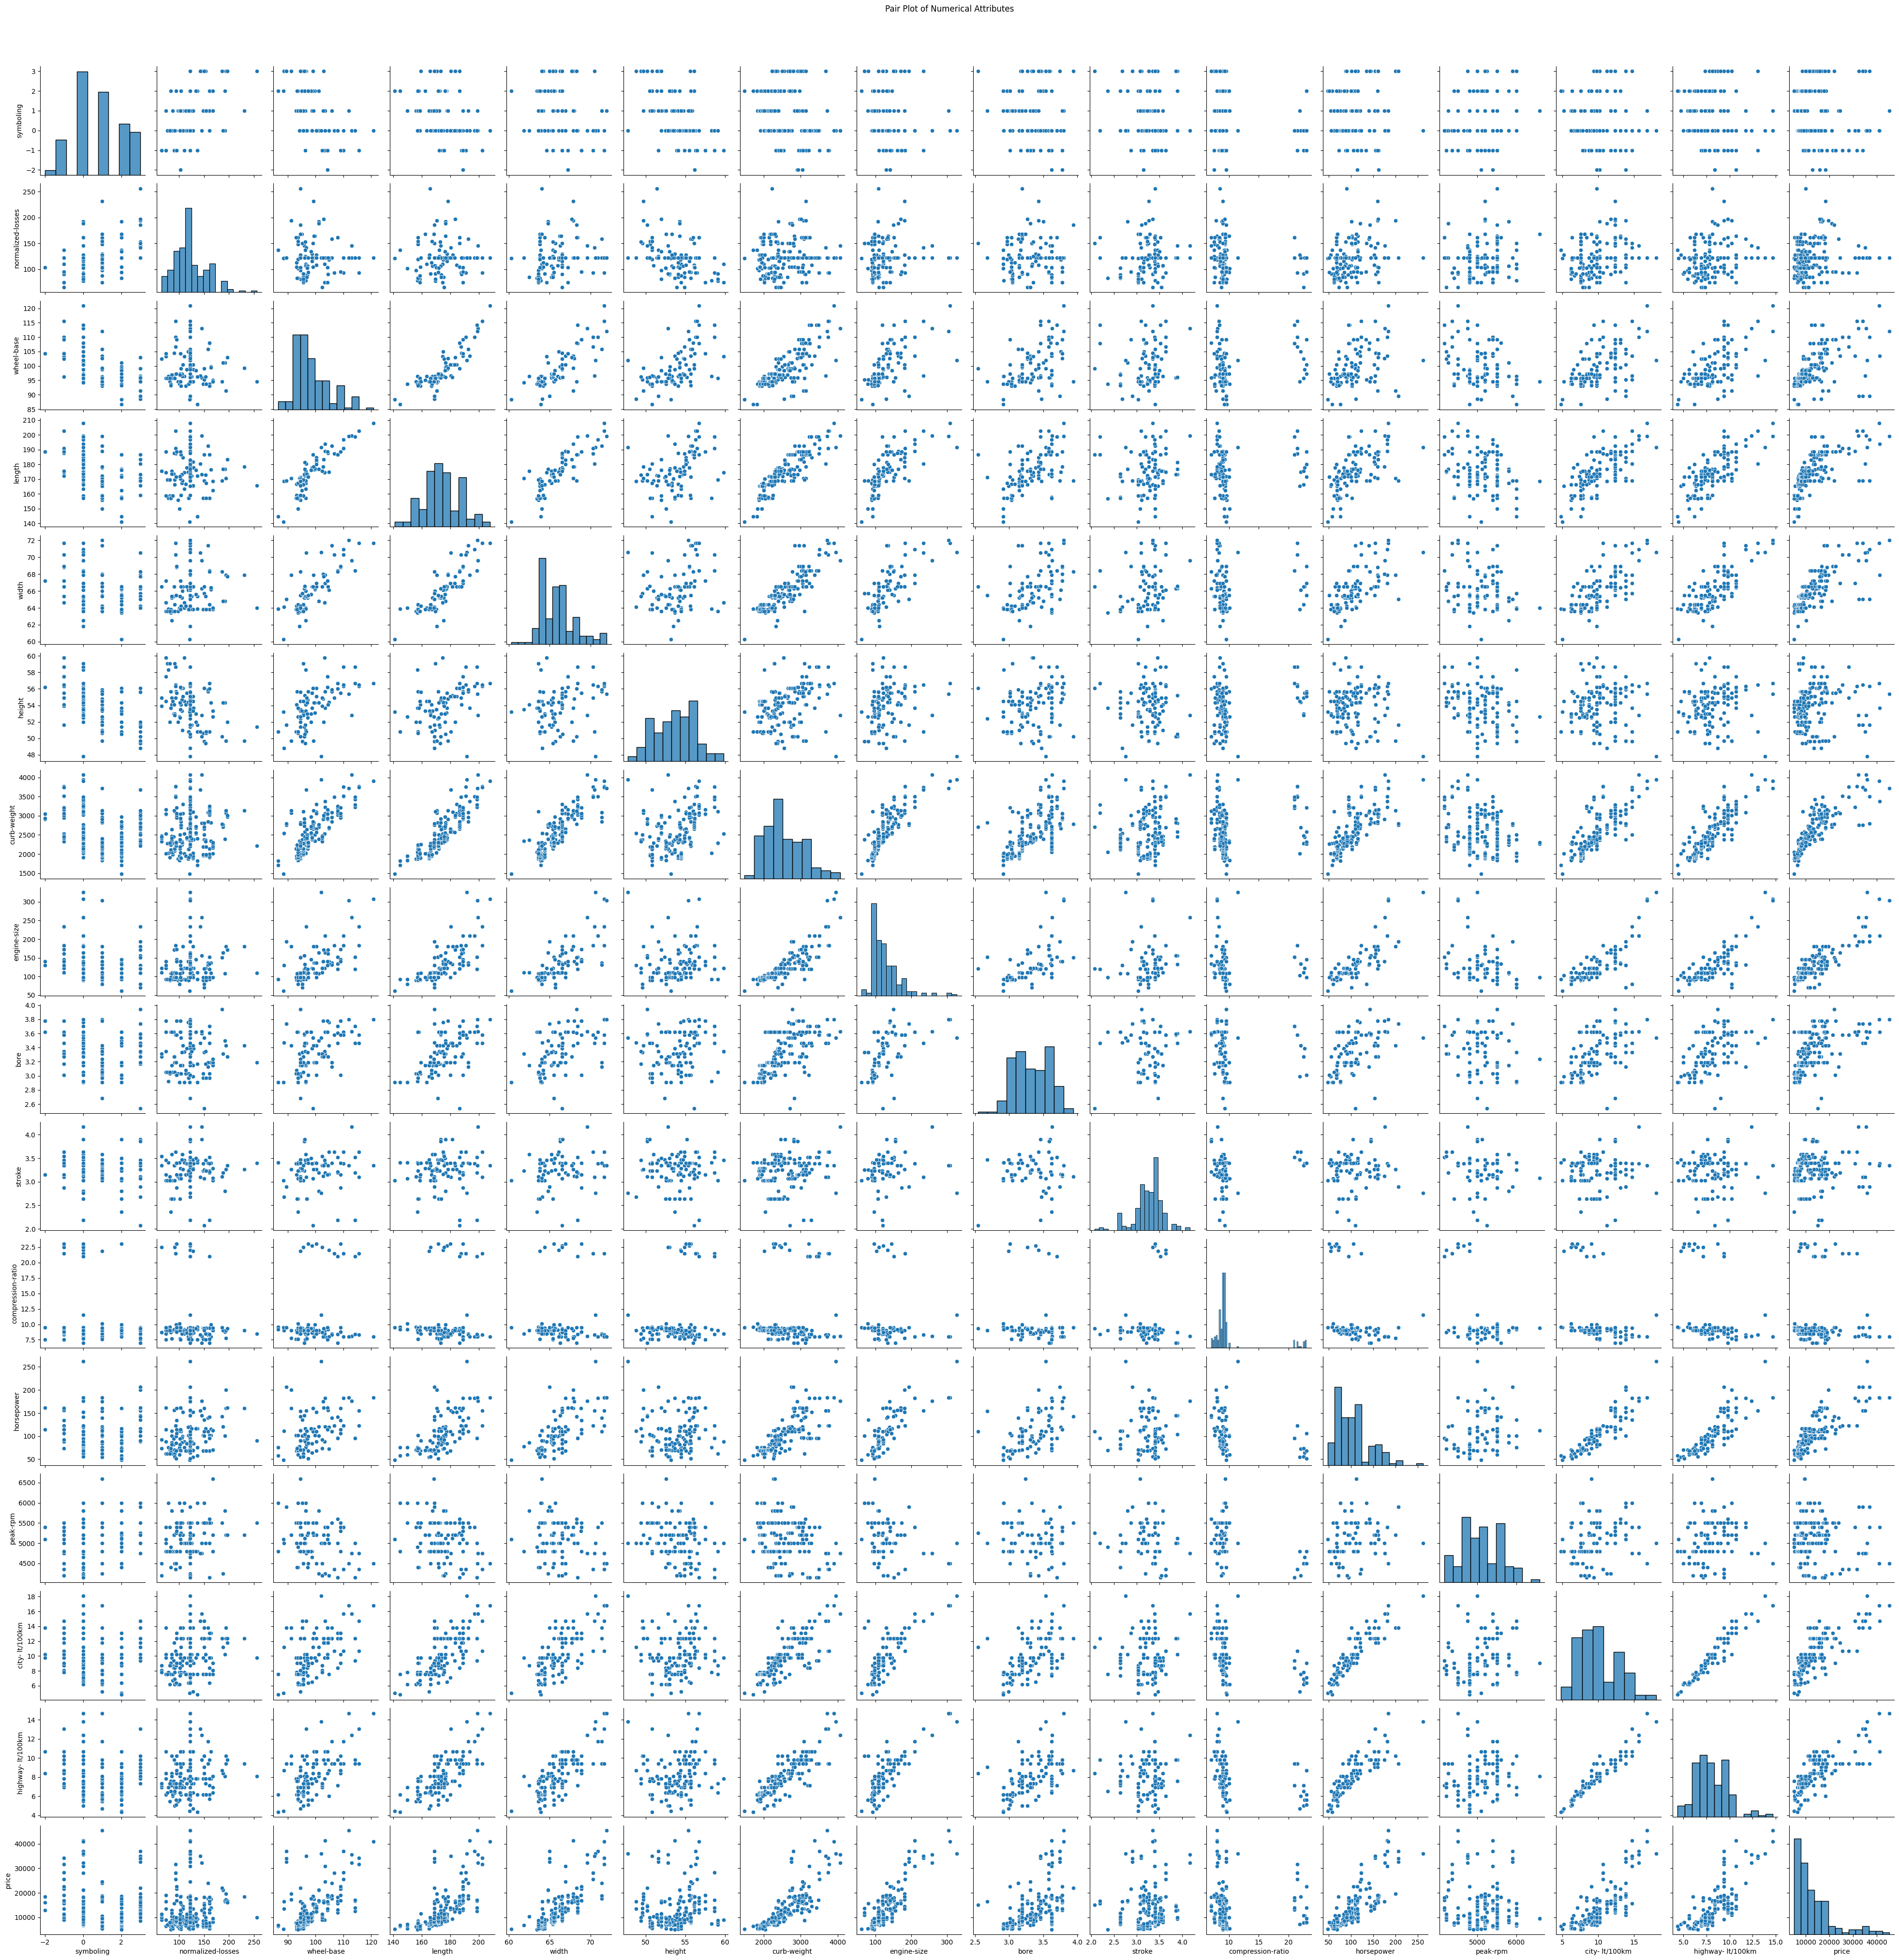

Pair Plot generated.


In [ ]:
# Now let try to plop them all !!

# Select only the numerical columns for the pair plot
numerical_df_for_plot = df[numheaders]
print("Creating Pair Plot of Numerical Columns...")
sns.pairplot(numerical_df_for_plot)
plt.suptitle('Pair Plot of Numerical Attributes', y=1.02) # Add a title to the entire plot
plt.show()

print("Pair Plot generated.")

**Now lets try normalizing our data**

> Add blockquote



In [ ]:




# Create a dropdown to select an attribute

dropdown = Dropdown(options=numheaders,description='Select an option:',disabled=False,)
output = Output()
def on_value_change(change):
    with output:
        output.clear_output()
        selected_attribute = change['new']
        print(f"You selected the numerical attribute: {selected_attribute}")
        attribute=selected_attribute
        df.select_dtypes(include=np.number).columns
        print(f"the car with the maximum {attribute} is:")
        max = describe(attribute)
dropdown.observe(on_value_change, names='value')
display(dropdown, output)


# Now lets print attributes together

attribute1_dropdown = Dropdown(options=numheaders,
                               description='Select Attribute 1:',
                               disabled=False)

attribute2_dropdown = Dropdown(options=numheaders,
                               description='Select Attribute 2:',
                               disabled=False)

plot_output = Output()

def update_plot(change):
    with plot_output:
        # Clear previous plot and output
        plot_output.clear_output()

        # Get the selected attributes from the dropdowns
        attribute1 = attribute1_dropdown.value
        attribute2 = attribute2_dropdown.value

        # Check if both attributes are selected and are valid columns
        if attribute1 and attribute2 and attribute1 in df.columns and attribute2 in df.columns:
            print(f"Plotting {attribute2} vs {attribute1}")

            # Create the scatter plot
            plt.figure(figsize=(8, 6)) # Set the figure size
            sns.scatterplot(x=attribute1, y=attribute2, data=df)
            plt.title(f'{attribute1} vs {attribute2}')
            plt.xlabel(attribute1)
            plt.ylabel(attribute2)
            plt.grid(True)
            plt.show()
        elif attribute1 or attribute2:
            # Message if one or both are not yet selected or invalid
            print("Please select two valid numerical attributes to plot.")

# Observe changes in both dropdowns
attribute1_dropdown.observe(update_plot, names='value')
attribute2_dropdown.observe(update_plot, names='value')

# Arrange the dropdowns and the output area using VBox
# HBox can be used to place widgets horizontally
widget_layout = VBox([HBox([attribute1_dropdown, attribute2_dropdown]),plot_output])

# Display the widgets
display(widget_layout)



# Select only the numerical columns for the pair plot
# We already have a variable 'numheaders' with the numerical column names
#numerical_df = df[numheaders]

# Create the pair plot
# You might want to limit the number of columns for a clear plot
#sns.pairplot(numerical_df) # This will plot all numerical columns

# Display the plot
#plt.show()

#print(numheaders)
#attribute= input("Select attribute from the headers list above .\n copy and paste the value you widh to see: ")


#

# Dataframe info summary
#df.info()
# Dataframe info summary
#df.info()
#df[['length', 'compression-ratio']].describe()